# CSCI 3022 Homework
<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below. 

In [2]:
NAME = "BENJAMIN WILSON"
COLLABORATORS = ""

If you referenced any web sites or solutions not of your own creation, list those references here:

* List any external references or resources here

---

# Homework 5
In this homework, we will simulate the central limit theorem.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

We will use the Monte-Carlo simulation method, which accepts if the generated random number is under the PDF curve and rejects if the number is above the PDF curve. This simple algorithm allows us to generate random numbers with any arbitrary probability distribution. Here are the starter codes:

In [4]:
def monte(N, pdf,param):
    accept=[]
    while len(accept)<N:
        x = np.random.sample()
        y = np.random.sample()
        t, p = pdf(x,param)
        if y<=p:
            accept.append([t,y])
    return np.array(accept)

def trsf(x,xmin,xmax):
    xm = (xmin+xmax)/2
    mag = xmax-xmin
    return mag*(x-0.5)+xm

def gamma(x,param):
    a = param[0]
    b = param[1]
    t = trsf(x,0,100)
    return t, (b**a)/math.gamma(a)*t**(a-1)*math.exp(-b*t)

The function `monte` takes input N (the number of samples to generate), pdf (pdf function), and param (parameters of the pdf), generates a random coordinate (x,y) in the uniform distribution space (x: 0~1, y: 0~1), then compares whether y<= pdf(x). Graphically, if the dot is below the curve, we take the sample, otherwise we discard.     
The function `gamma` is an example distribution (Gamma distribution) that we learned before.      
https://en.wikipedia.org/wiki/Gamma_distribution     
A Gamma distribution has two parameters a (shape) >0 and b (rate) >0, and a variable x in (0,inf). In the function `gamma` above, we use the function `trsf` to scale the random variable `x`, origianlly (0~1) to (0~100), as an approximation of (0,inf).      
Below is a visualization of selected random variables following Gamma(2,1).    


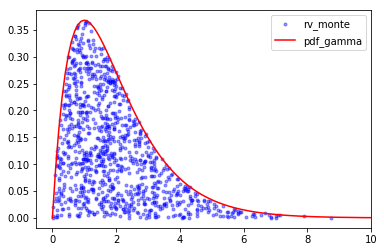

In [5]:
rv = monte(1000,gamma,[2,1]) #using a = 2, b =1
x = np.linspace(0,1,1000)
ty = np.array(list(map(lambda s: gamma(s,[2,1]),x)))
plt.plot(rv[:,0],rv[:,1],'b.',alpha=0.4,label='rv_monte')
plt.plot(ty[:,0],ty[:,1], 'r-',label='pdf_gamma')
plt.xlim(-0.5,10) 
plt.legend()

In [16]:
np.median(rv[:,0])
n=10
samples=np.random.choice(rv[:,0],10)
samplemean=np.mean(samples)
samplemean

1.530966535473103

The central limit theorem states that as the sample size goes up, the mean of samples gets closer to a normal distribution. Let's run a simulation if that's true. 

### Q1. Implement the algorithm:
1. take a samplesize `n` as an input, and sample the n samples from the random variables we generated from above (using `monte`).
2. take the mean of the `n` samples.
3. repeat the process (round) for N times (let's call this `nit` for N iterations).
4. build a function called `clt` and return an array of mean sample values. The output size should be equal to `nit`, and each element represent the mean value of the `n` samples for each round.

In [26]:
# complete the function using above algorithm
def clt(x,n,nit=100):
    """
    x: array of random variables
    n: sample size per iteration
    nit: number of iterations 
    """
    result=[]
    for iter in range(nit):
        samples=np.random.choice(rv[:,0],n)
        samplemean=np.mean(samples)
        result.append(samplemean)
    return np.array(result)

### Q2. Visualize the result
Now, let's execute `clt` with `n`=10 and `nit`=1000 and input random variables above (`rv`).    
Visualize the histogram of the mean values and compare with the theoretical pdf function.    
**Caution** You will have to adjust the scaling of the pdf function to match the histogram's height and bin size.

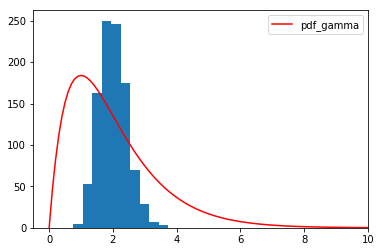

In [27]:
sm=clt(rv,10,1000)
x = np.linspace(0,1,1000)
ty = np.array(list(map(lambda s: gamma(s,[2,1]),x)))
plt.plot(ty[:,0],ty[:,1]*500, 'r-',label='pdf_gamma')
plt.hist(sm)
plt.xlim(-0.5,10) 
plt.legend()

### Q3. Demonstration of CLT
Now repeat the simulation for `n`=1, 2, 5, 10, 100, using fixed iterations `nit`=1000, and visualize each.
What do you observe as the sample size `n` increases?

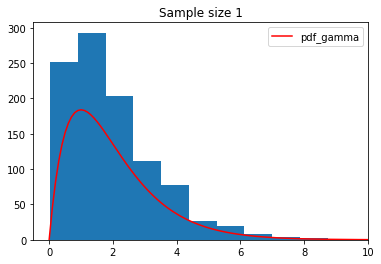

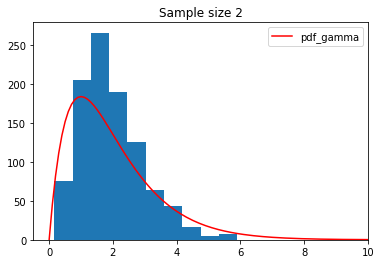

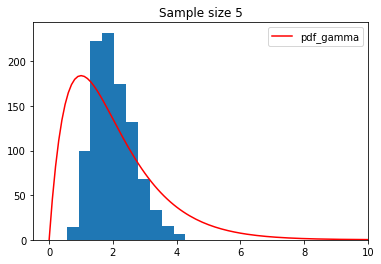

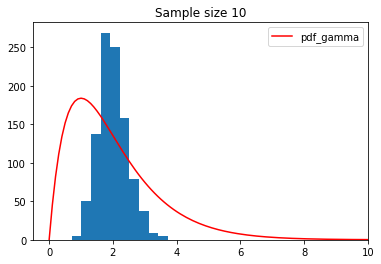

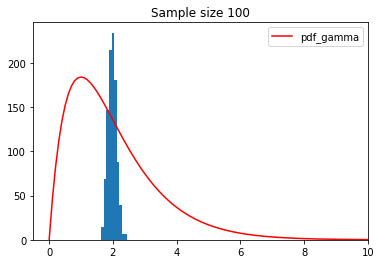

In [28]:
for bin in [1,2,5,10,100]:
    sm=clt(rv,bin,1000)
    x = np.linspace(0,1,1000)
    ty = np.array(list(map(lambda s: gamma(s,[2,1]),x)))
    plt.plot(ty[:,0],ty[:,1]*500, 'r-',label='pdf_gamma')
    plt.hist(sm)
    plt.xlim(-0.5,10) 
    plt.legend()
    plt.title('Sample size {}'.format(bin))
    plt.show()

As the number of samples increase, the variance decreases and the distribution is more pointed around 2.

### Q4. Optional Play
Pick any distribution (cool if more weird shape) and simulate the CLT with it, visualize your result.

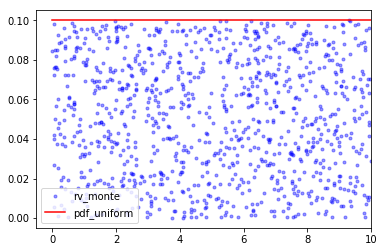

In [41]:
def uniform(x,param):
    a=param[0]
    b=param[1]
    t = trsf(x,0,10)
    return t,1.0/(b-a)
rv = monte(1000,uniform,[0,10])
x = np.linspace(0,1,1000)
ty = np.array(list(map(lambda s: uniform(s,[0,10]),x)))
plt.plot(rv[:,0],rv[:,1],'b.',alpha=0.4,label='rv_monte')
plt.plot(ty[:,0],ty[:,1], 'r-',label='pdf_uniform')
plt.xlim(-0.5,10) 
plt.legend()

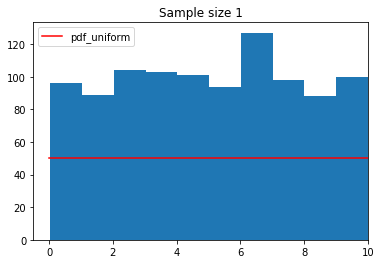

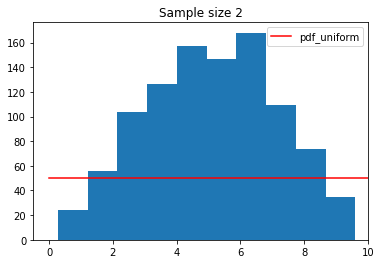

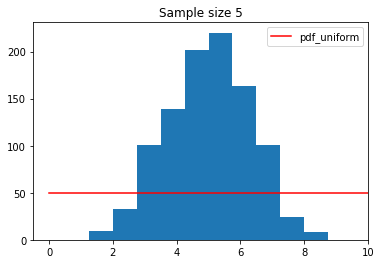

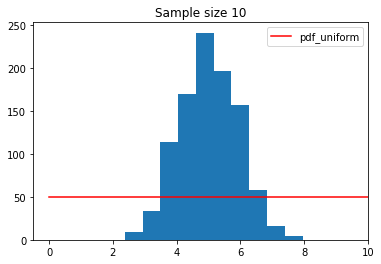

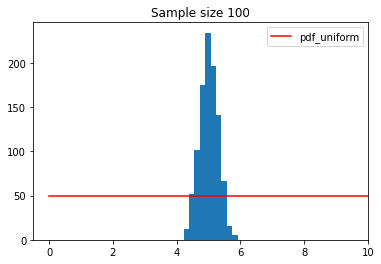

In [43]:
for bin in [1,2,5,10,100]:
    sm=clt(rv,bin,1000)
    x = np.linspace(0,1,1000)
    ty = np.array(list(map(lambda s: uniform(s,[0,10]),x)))
    plt.plot(ty[:,0],ty[:,1]*500, 'r-',label='pdf_uniform')
    plt.hist(sm)
    plt.xlim(-0.5,10) 
    plt.legend()
    plt.title('Sample size {}'.format(bin))
    plt.show()